In [142]:
from pandas import read_csv
features = ['name','age','gender','education',
            'income','country','purchase_frequency',
            'spending']
dataframe = read_csv('customer_data.csv', names = features) 
dataframe.drop(index=dataframe.index[0], axis = 0, inplace = True)

dataframe

,name,age,gender,education,income,country,purchase_frequency,spending
1,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.119999999999
2,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.04
3,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
4,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.51
5,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780000000002
...,...,...,...,...,...,...,...,...
996,Jason Haas,42,Female,PhD,98170,Bosnia and Herzegovina,0.7,17435.949999999997
997,Sharon Valdez,39,Male,High School,59174,Eritrea,0.9,11662.830000000002
998,Andrew Taylor,50,Male,Master,59808,Serbia,0.4,7196.160000000001
999,Jessica Johnson,50,Female,Master,58272,Cyprus,0.7,13939.519999999999


In [143]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataframe['gender'] = label_encoder.fit_transform(dataframe['gender'])
dataframe['education'] = label_encoder.fit_transform(dataframe['education'])
dataframe['country'] = label_encoder.fit_transform(dataframe['country'])

dataframe

,name,age,gender,education,income,country,purchase_frequency,spending
1,Teresa Williams MD,42,0,1,53936,195,0.9,13227.119999999999
2,Christine Myers,49,0,2,82468,11,0.6,12674.04
3,Dwayne Moreno,55,1,0,56941,55,0.3,5354.115
4,Amy Norton,24,0,0,60651,163,0.2,2606.51
5,Tonya Adams,64,1,2,81884,237,0.9,18984.780000000002
...,...,...,...,...,...,...,...,...
996,Jason Haas,42,0,3,98170,26,0.7,17435.949999999997
997,Sharon Valdez,39,1,1,59174,65,0.9,11662.830000000002
998,Andrew Taylor,50,1,2,59808,190,0.4,7196.160000000001
999,Jessica Johnson,50,0,2,58272,55,0.7,13939.519999999999


In [144]:
from sklearn.preprocessing import MinMaxScaler

numFeatures = ['income','spending']
scaler = MinMaxScaler()
dataframe[numFeatures] = scaler.fit_transform(dataframe[numFeatures])

dataframe.drop(columns=['name'], inplace = True)

dataframe

,age,gender,education,income,country,purchase_frequency,spending
1,42,0,1,0.425146,195,0.9,0.505931
2,49,0,2,0.782919,11,0.6,0.483749
3,55,1,0,0.462827,55,0.3,0.190183
4,24,0,0,0.509348,163,0.2,0.079991
5,64,1,2,0.775596,237,0.9,0.736842
...,...,...,...,...,...,...,...
996,42,0,3,0.979812,26,0.7,0.674726
997,39,1,1,0.490827,65,0.9,0.443195
998,50,1,2,0.498777,190,0.4,0.264059
999,50,0,2,0.479517,55,0.7,0.534501


In [145]:
from sklearn.model_selection import train_test_split

features = ['age', 'gender', 'education', 
            'income', 'country', 'purchase_frequency']

X = dataframe[features]
y = dataframe['spending'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape

(700, 6)

In [146]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

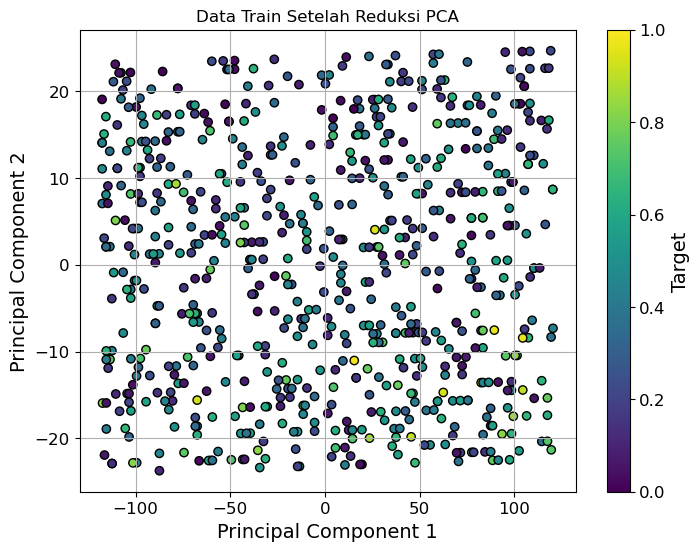

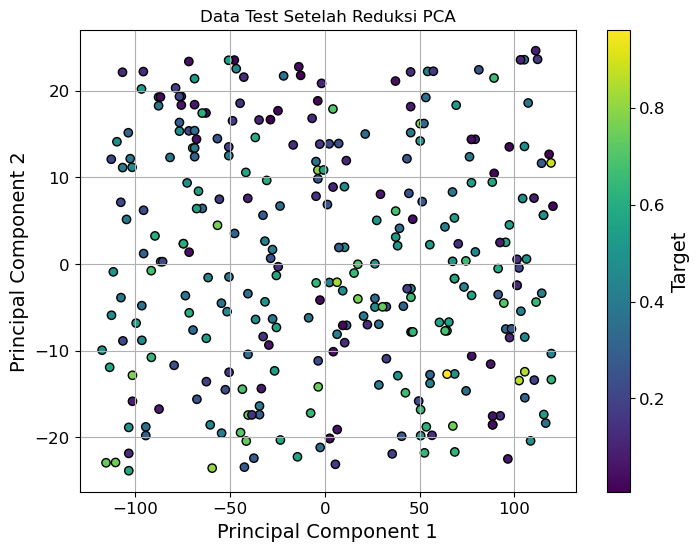

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
            c=y_train, cmap='viridis', edgecolor='k')
plt.title('Data Train Setelah Reduksi PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], 
            c=y_test, cmap='viridis', edgecolor='k')
plt.title('Data Test Setelah Reduksi PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()


In [148]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(X_train_pca)

train_cluster_labels = kmeans.predict(X_train_pca)
test_cluster_labels = kmeans.predict(X_test_pca)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


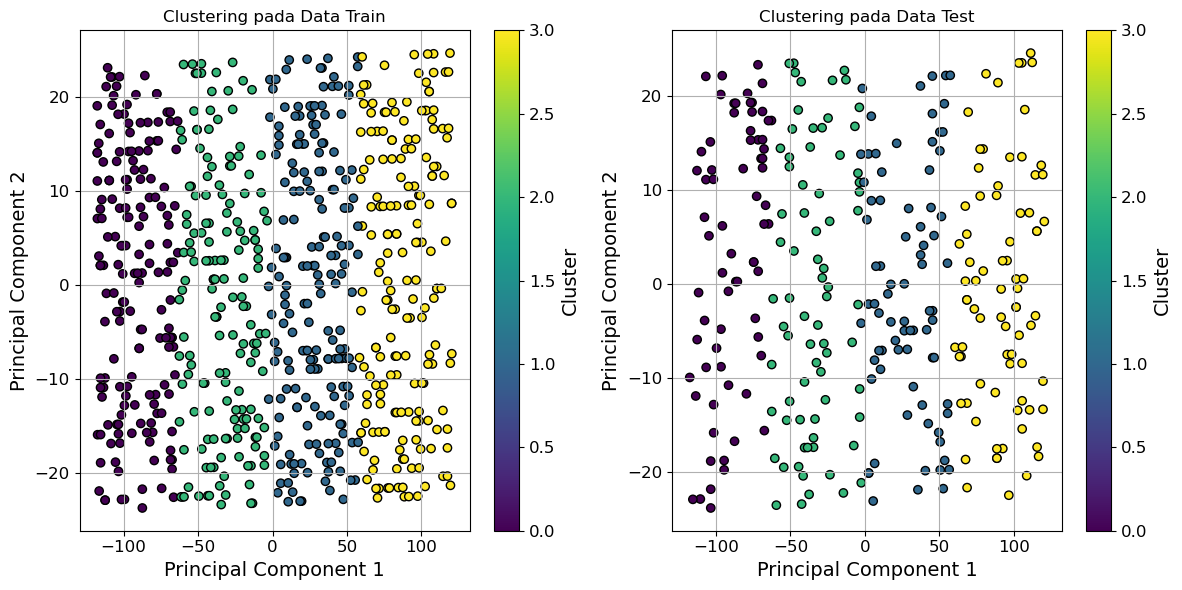

In [149]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c=train_cluster_labels, cmap='viridis', 
            edgecolor='k')
plt.title('Clustering pada Data Train')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], 
            c=test_cluster_labels, cmap='viridis', 
            edgecolor='k')
plt.title('Clustering pada Data Test')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)

plt.tight_layout()
plt.show()

In [150]:
inertia = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertia.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

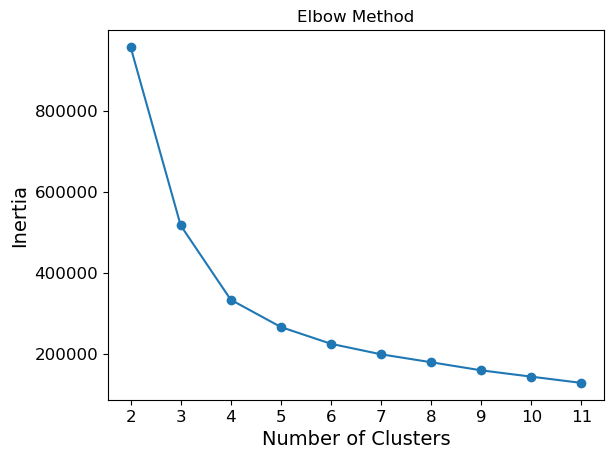

In [151]:
plt.plot(range(2, 12), inertia, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(2, 12))
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


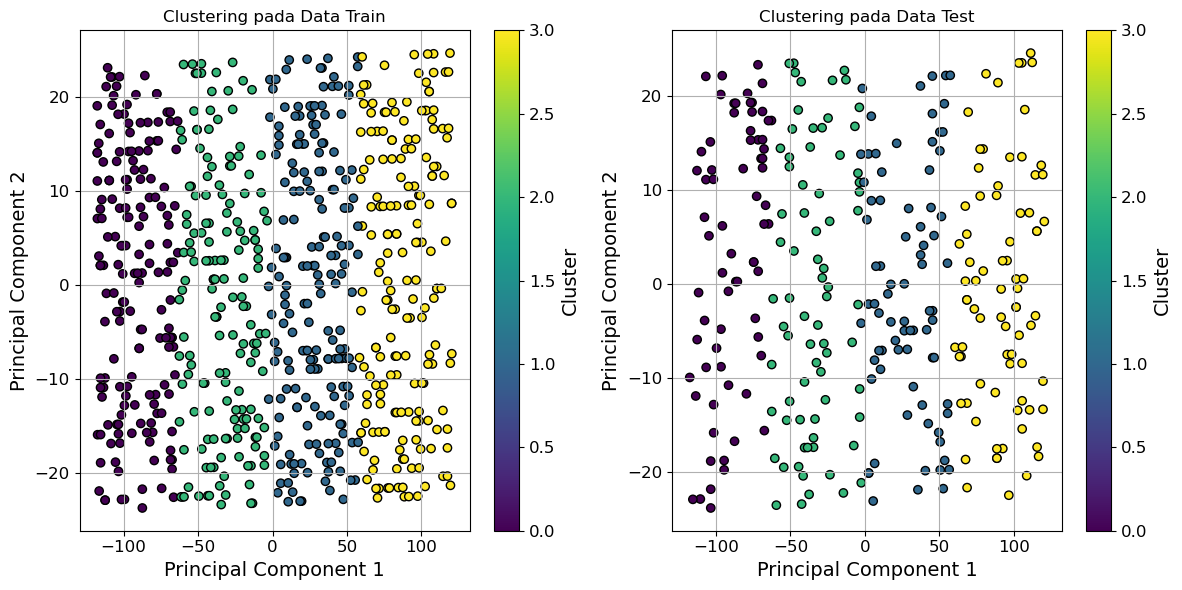

In [152]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_train_pca)

train_cluster_labels = kmeans.predict(X_train_pca)
test_cluster_labels = kmeans.predict(X_test_pca)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
            c=train_cluster_labels, cmap='viridis', 
            edgecolor='k')
plt.title('Clustering pada Data Train')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], 
            c=test_cluster_labels, cmap='viridis', 
            edgecolor='k')
plt.title('Clustering pada Data Test')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)

plt.tight_layout()
plt.show()